# Проект: Принятие решений в бизнесе

- Описание проекта
Вместе с отделом маркетинга был подготовлен список 9 гипотез для увеличения выручки.
- Цель работы: приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.
Чтобы достить поставленной цели необходимо:получить данные, провести из предобработку, провести приоритизацию гипотез и анализ А/В теста.

## Приоритизация гипотез

### Предобработка данных

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df=pd.read_csv("/datasets/hypothesis.csv")

In [ ]:
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


В df представленны столбцы со следующими значениями:
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [ ]:
#приведем название столбцов к нижнему регистру
df.columns=df.columns.str.lower()

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum().sum()

0

Дубликатов и нулевых значений нет

In [ ]:
df

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


### Приоритизация гипотез способами ICE и RICE

In [ ]:
# приоритизация гипотез способом ICE
df['ICE']=df['impact']*df['confidence']/df['efforts']

In [ ]:
df.sort_values(by='ICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


Согласно значению ICE, наиболее приоритетными являются гипотезы 8, 0, 7

In [ ]:
# приоритизация гипотез способом RICE
df['RICE']=df['reach']*df['impact']*df['confidence']/df['efforts']

In [ ]:
df.sort_values(by='RICE',ascending=False)

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


Согласно значению RICE, наиболее приоритетными являются гипотезы 7, 2, 0

Видно, что приоритезация гипотез при применении RICE вместо ICE изменилась: наиболее приоритетной стала гипотеза 7(до этого самой приоритетной гипотезой была 8). Исходя из этого можно сделать вывод, что учитывание охвата(reach) меняет приоритетность гипотез. В итоге в качестве самой приоритетной гипотезы целесообразно выбрать гипотезу 7 (целесообразно учитывать не только влияние пользователей, уверенность в гипотезе и затраты ресурсов на проверку гипотезы, но и охват пользователей, которых коснется изменение)

## Анализ A/B-теста

### Предобработка данных

In [ ]:
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')

In [ ]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [ ]:
orders.columns=orders.columns.str.lower()
orders.rename(columns = {'transactionid':'transaction_id', 'visitorid':'visitor_id'}, inplace = True )

In [ ]:
orders.duplicated().sum()

0

In [ ]:
orders.isnull().sum().sum()

0

In [ ]:
orders["date"]=pd.to_datetime(orders["date"])

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


В orders нет явный дубликатов и пропусков, кроме того мы провели замену типов данных даты на тип datetime

In [ ]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [ ]:
visitors.duplicated().sum()

0

In [ ]:
visitors.isnull().sum().sum()

0

In [ ]:
visitors["date"]=pd.to_datetime(visitors["date"])

In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


В visitors нет явный дубликатов и пропусков, кроме того мы провели замену типов данных даты на тип datetime

### Анализ результатов теста

In [ ]:
# график кумулятивной выручки по группам
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


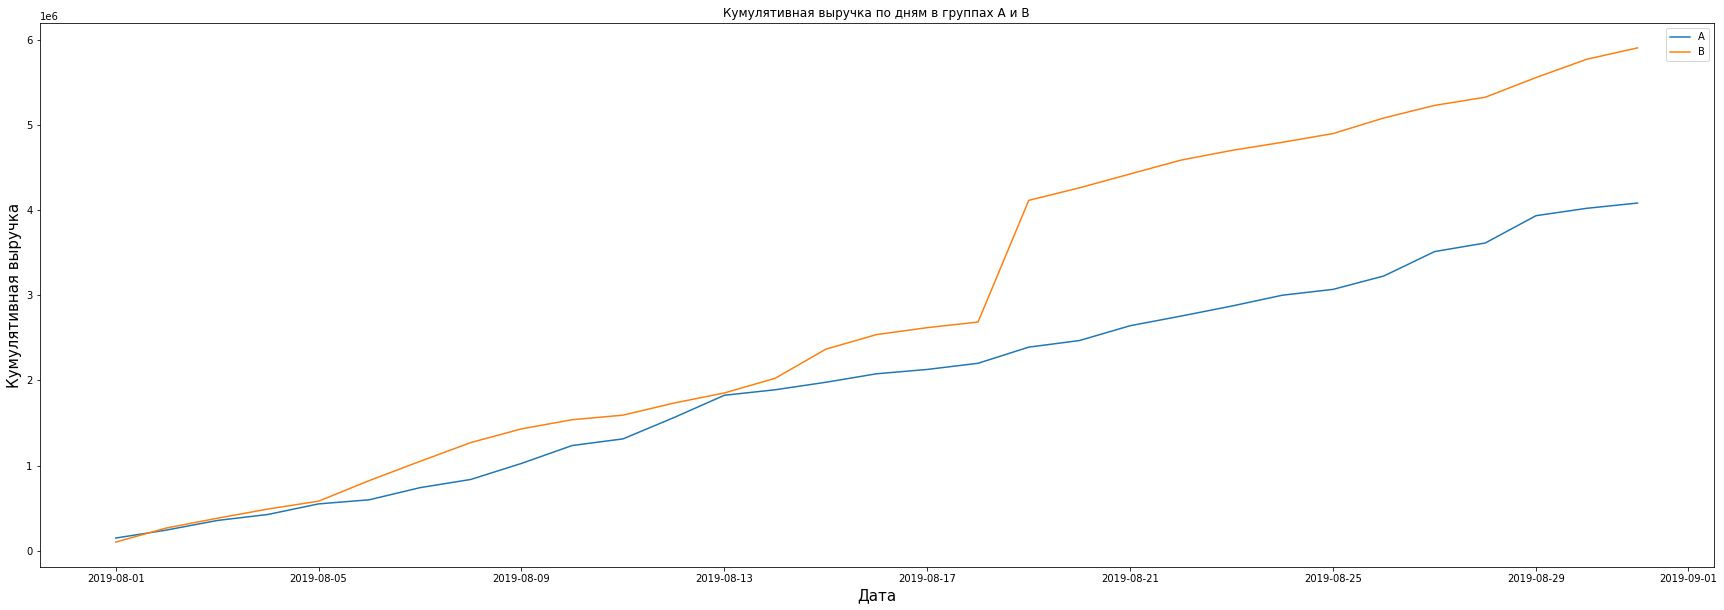

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(30,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('Кумулятивная выручка по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Кумулятивная выручка', fontsize=15)

plt.legend()

Выручка почти равномерно увеличивается в течение всего теста. Однако графики выручки обеих групп в нескольких точках резко растут, а также кривая выручки группы B стабильно выше, чем аналогичный показатель группы А. Это может сигнализировать о всплесках числа заказов.

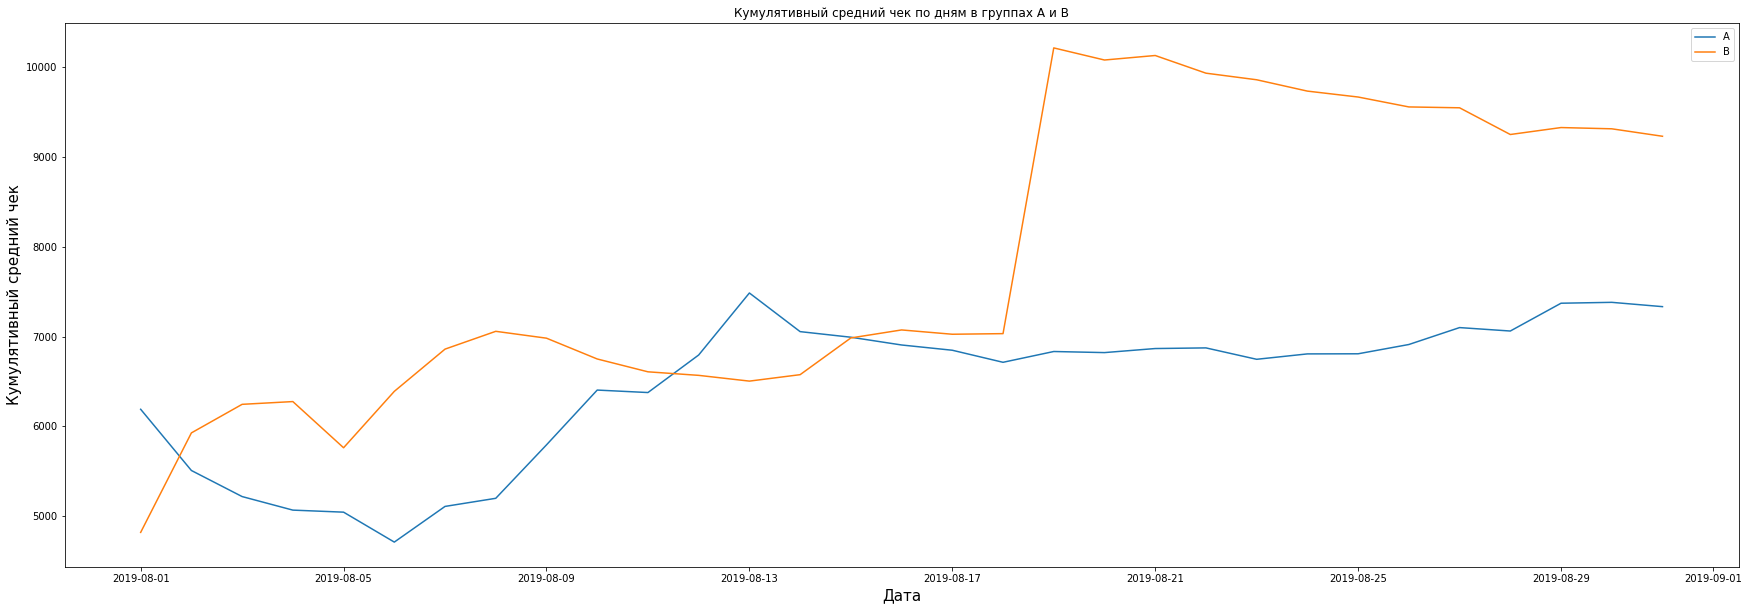

In [ ]:
# график кумулятивного среднего чека по группам
plt.figure(figsize=(30,10))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по дням в группах А и В', fontsize=12)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Кумулятивный средний чек', fontsize=15)
plt.legend()

Изменение среднего чека для групп не так однозначно:кривые то падают, то резко растут. Так например для группы B виден резкий скачок, что говорит о крупной покупке.

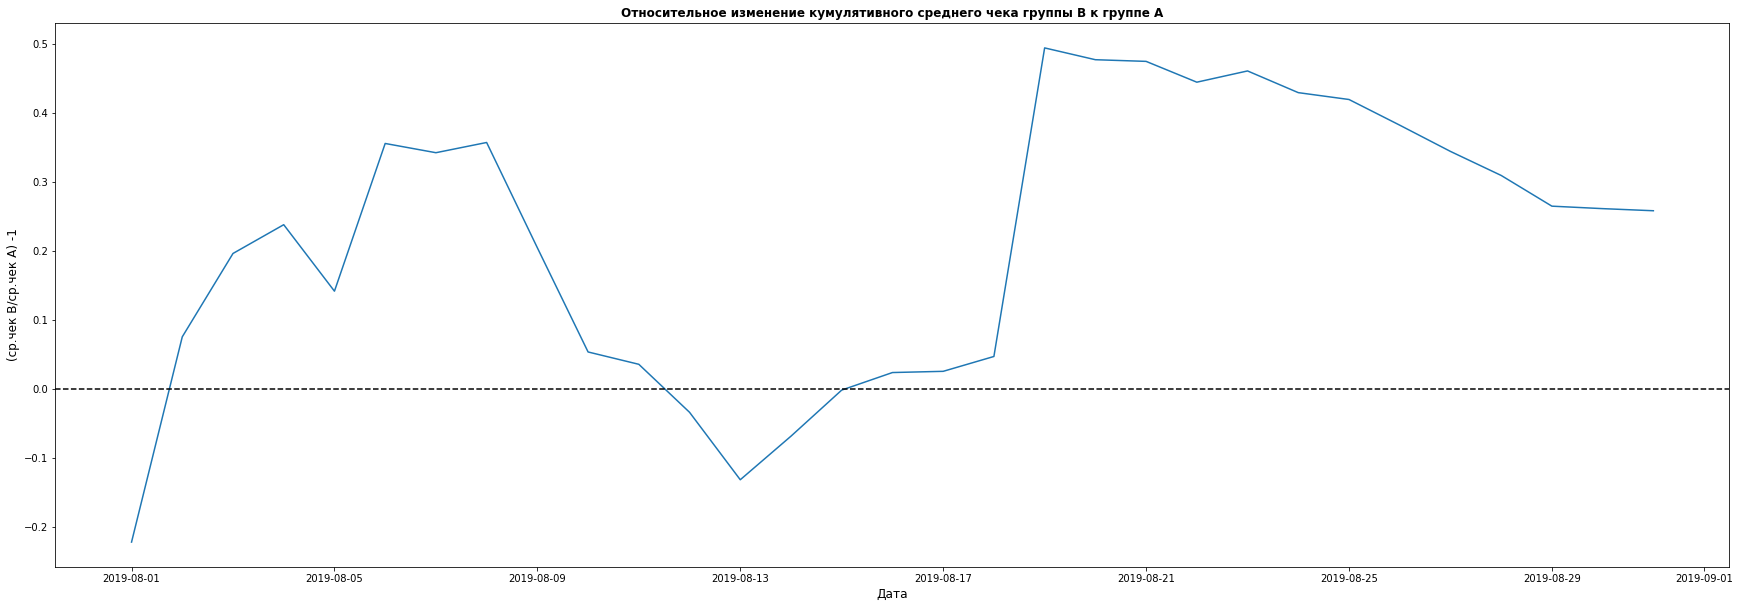

In [ ]:
# график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(30,10))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(ср.чек В/ср.чек А) -1', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--')

По графику видно, что в нескольких точках графика различия между сегментами резко изменяется, что может говорить о наличии выбросов. Кроме того, есть два пика, когда средний чек группы B значительно превосходил этот показатель группы А.

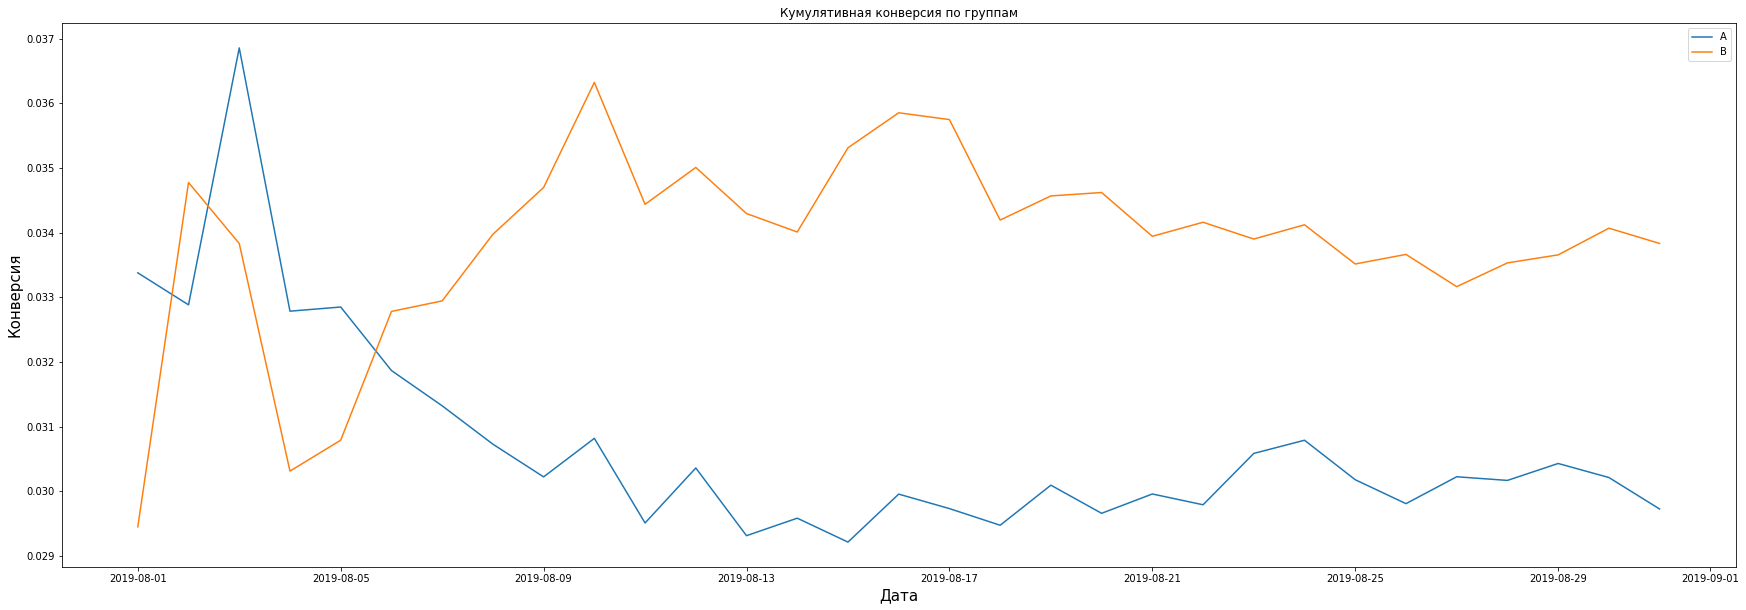

In [ ]:
# график кумулятивного среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(30,10))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам', fontsize=12)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Конверсия', fontsize=15)
plt.legend()

Комулятивная конверсия группы B почти на всем промежутке выше коммулятивной конверсии группы А, отметим что конверсии колебались и имели неоднозначный характер изменения( то увеличивались, то уменьшались).

Text(0, 0.5, '(конверсия В/конверсия А) -1')

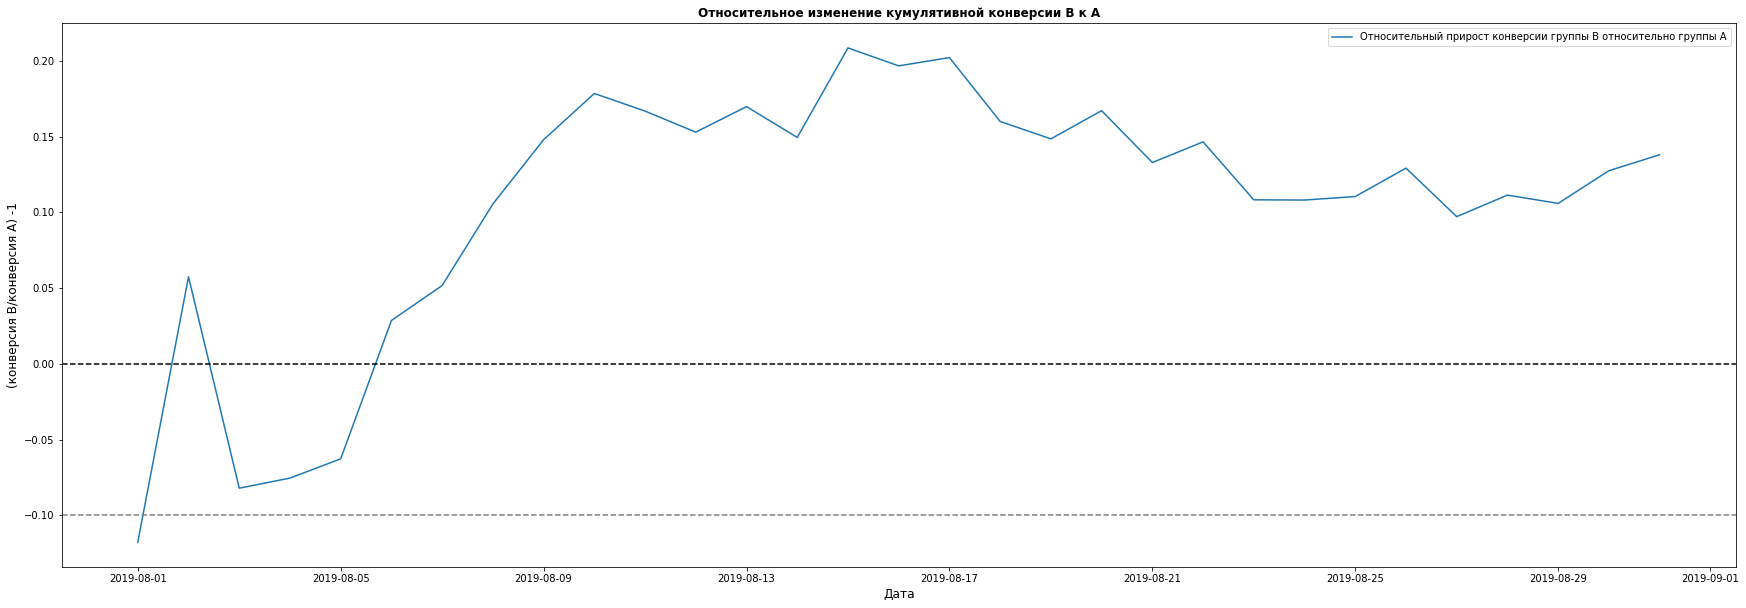

In [ ]:
# график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(30,10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии В к А', fontsize=12, fontweight='bold')
plt.xlabel('Дата', fontsize=12)
plt.ylabel('(конверсия В/конверсия А) -1', fontsize=12)

Сначала конверсия группы В была ниже группы А, но потом конверсия группы В опередила конверсию А(эта тенденция продолжалась до конца теста).Кроме того, на графике наблюдаются скачки, что говорит о наличии выбросов.

In [ ]:
# точечный график количества заказов по пользователям
ordersByUsers = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))

ordersByUsers.columns = ['visitor_id', 'orders']

In [ ]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали более 10 заказов.

Text(0, 0.5, 'Количество пользователей')

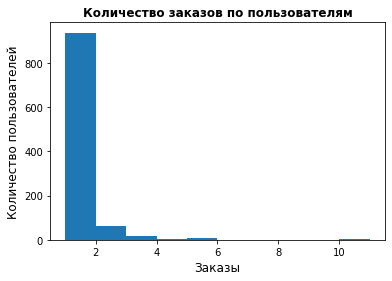

In [ ]:
plt.hist(ordersByUsers['orders'])
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.xlabel('Заказы', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)

Большинство покупателей заказывали только один раз. Имеется некая доля сделавших заказ от 2 до 4 раз.

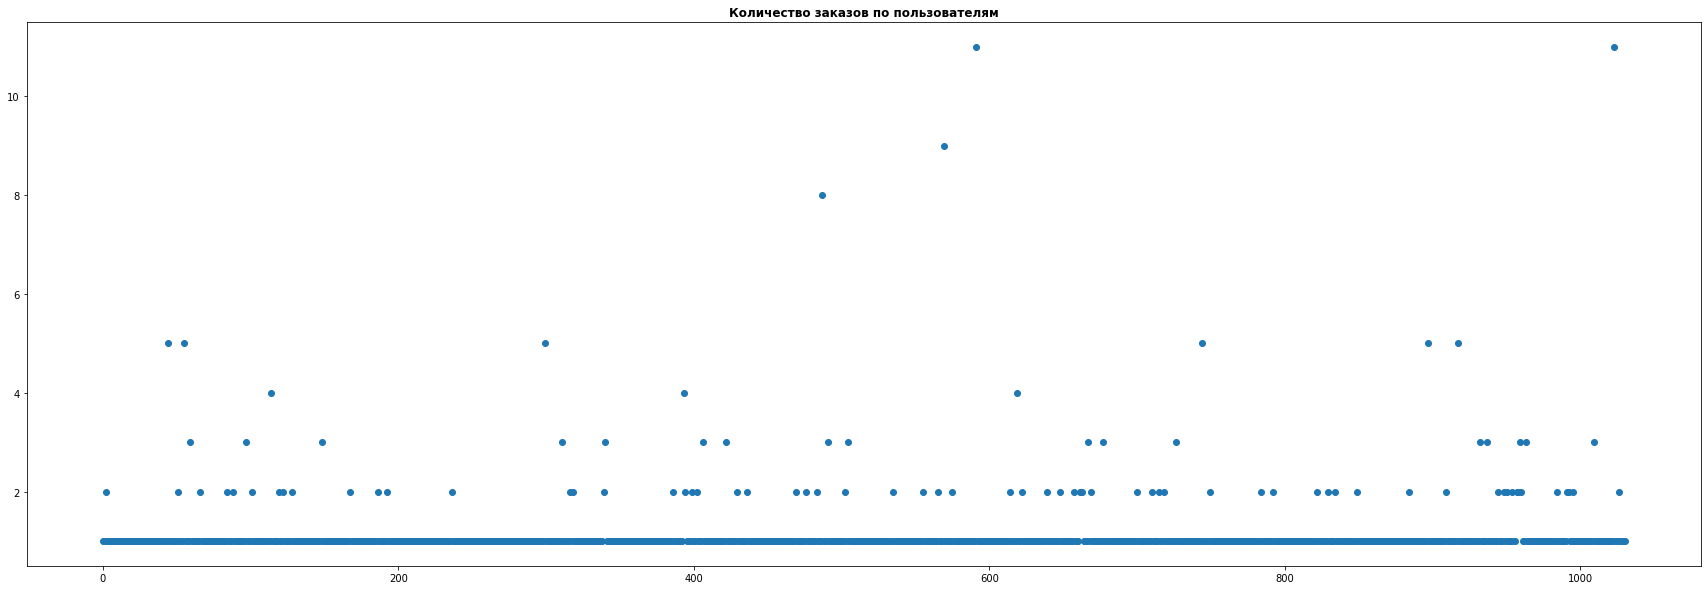

In [ ]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(30,10))
plt.title('Количество заказов по пользователям', fontsize=12, fontweight='bold')
plt.scatter(x_values, ordersByUsers['orders'])

Большая часть заказов составляет от 1 до 2 заказов на пользователя. Можно предположить, что остальные значения являются выбросами.

In [ ]:
# 95-й и 99-й перцентили количества заказов на пользователя
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


Не более 5% пользователей оформляли больше чем 2 заказа, и не более 1% пользователей оформляли больше 4 заказов. Целесообразно отсеить пользователей, которые совершили 3 и более заказов, что уберет до 3% пользователей с большим количеством заказов.

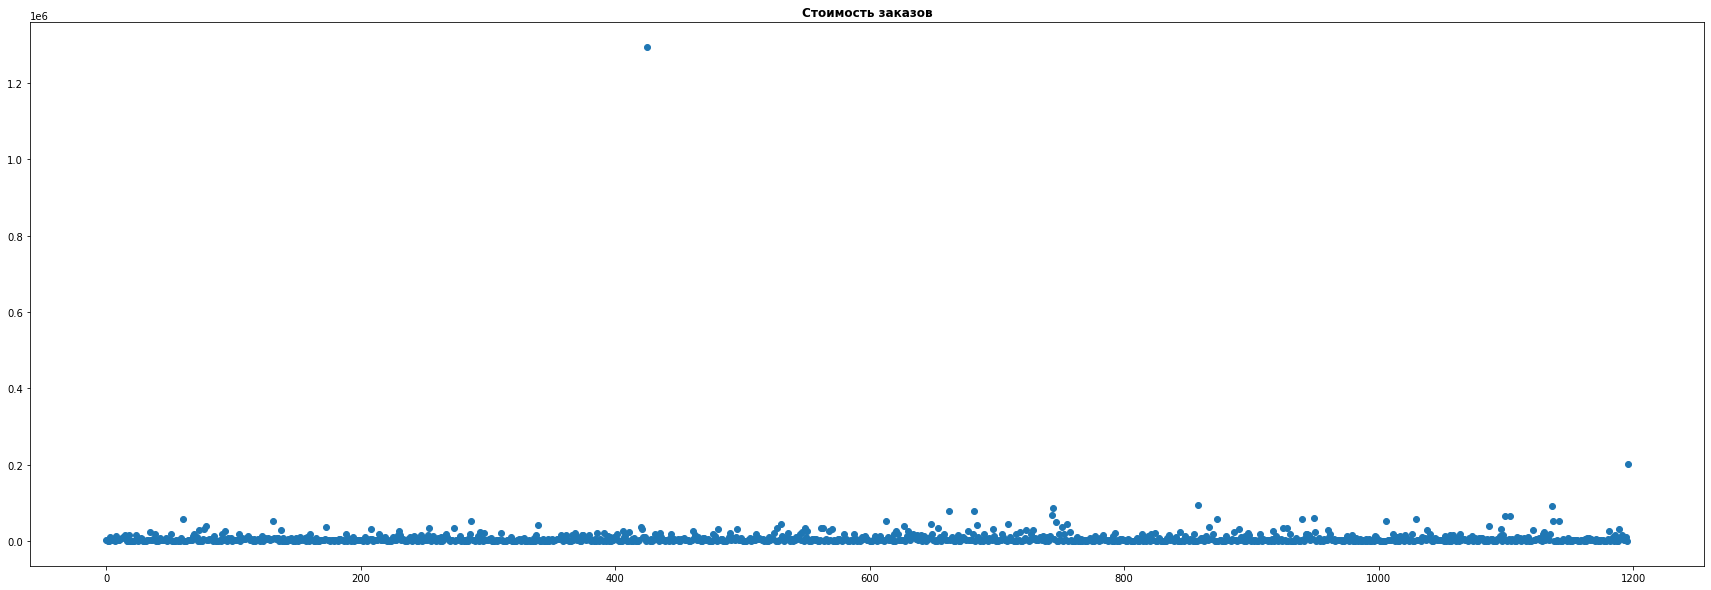

In [ ]:
# точечный график стоимостей заказов
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(30,10))
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.scatter(x_values, orders['revenue'])

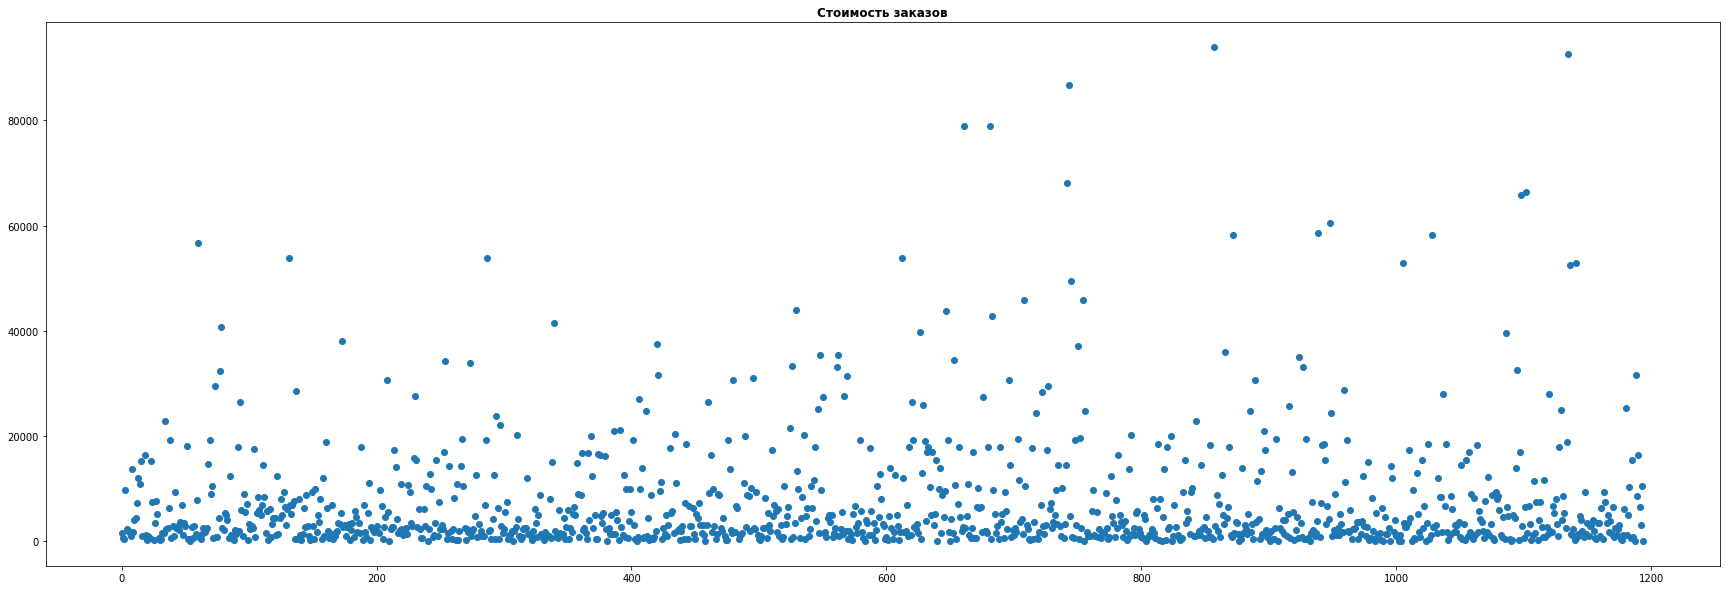

In [ ]:
# подробнее рассмотрим заказы до 200000
x_values = pd.Series(range(0,len(orders[orders['revenue']<=200000]['revenue'])))

plt.figure(figsize=(30,10))
plt.title('Стоимость заказов', fontsize=12, fontweight='bold')
plt.scatter(x_values, orders[orders['revenue']<=200000]['revenue'])

На графиках мы явно видим заказы, которые выбиваются из общего числа.

In [ ]:
# 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% пользователей оформляли больше чем на 28000 руб, и не более 1% пользователей оформляли больше чем на 58233 руб. Уберем заказы на более 28000 рублей.

Сформулируем гипотезы:
- H0: различий в среднем количестве заказов между группами нет.
- H1: различия в среднем между группами есть.

In [ ]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

In [ ]:
# статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


По "сырым" данным значение p-value = 0.017, что меньше 0.05 , следовательно гипотезу о том, что различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8%

Сформулируем гипотезы:
- H0: различий в среднем чеке между группами нет.
- H1: различия в среднем чеке между группами есть.

In [ ]:
# статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value(0.729) значительно больше 0.05. Следовательно, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Следовательно, различий в среднем чеке между группами нет. Однако, относительная разница среднего чека между группами составила 25.8%, что говорит о наличии выбросов.

In [ ]:
# узнаем, сколько всего аномальных пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitor_id, dtype: int64
74


Всего 74 аномальных пользователя.

In [ ]:
# статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [ ]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.173


Результаты по среднему количеству заказов изменились незначительно(значение p-value уменьшилось на 0.004, а относительный выигрыш группы B увеличился на 3.5%.

In [ ]:
# статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным.
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


P-value немного увеличилось(на 0.009), но также осталось значительно больше 0.05. По очищенным данным проигрыш среднего чека группы В относительно А составляет 2%.

Имеющиеся факты:
- Различия в среднем между группами ест и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B имеют тенденцию к росту.
- График различия среднего чека колеблется.

Исходя из обнаруженных фактов, тест следует остановить, признать его успешным и перейти к проверке следующей гипотезы.

## Вывод:
В результате проектной работы была проведена приоритизация гипотез способами ICE и RICE. В результате была выбрана приоритетная гипотеза 7.
Также был проведен анализ A/B теста, в результате чего было выявлено:
- Кривая выручки группы B стабильно выше, чем аналогичный показатель группы А
- Изменение среднего чека для групп не так однозначно
- Средний чек группы B имеет промежутки значительного превосходства этотого показателя для группы А
- Комулятивная конверсия группы B почти на всем промежутке выше коммулятивной конверсии группы А
- Сначала конверсия группы В была ниже группы А, но потом конверсия группы В опередила конверсию А
- Большая часть заказов составляет от 1 до 2 заказов на пользователя
- Не более 5% пользователей оформляли больше чем на 28000 руб
- Различия в среднем между группами ест и по «сырым», и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
В результате следует остановить тест, признать его успешным и перейти к проверке следующей гипотезы.